# **Casos de Uso**
## Grupo 3
## Módulo: Fundamentos de Python

# <font color='blue'>__Caso de uso : Yisella Carrasco__</font>
## ***Estimación población extranjera en Chile, Región de antofagasta, año 2022***

En el análisis ecónomico usamos constantemente bases de datos para generar información que aporte a la toma de decisiones para el sector público y privado. En este sentido, en los últimos años ha estado sobre la mesa del debate la caracterización de la población extranjera en nuestro país. Utilizaré una base de datos pública para realizar una primera aproximación al conocimiento de la población extranjera en Antofagasta para el año 2022.

In [ ]:
# Importar pandas
import pandas as pd

#Se monta el drive en colab y llama la base
from google.colab import drive
drive.mount('/content/drive')
BASE_2022 = '/content/drive/MyDrive/base-2022-comunas.csv'

# Carga el archivo CSV en un DataFrame
df = pd.read_csv(BASE_2022, encoding='ISO-8859-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Miraré los primeros datos para verificar la importación de los datos
df.head(5)

,SEXO,EDAD,PAIS,AÑO ESTIMACION,REGION,COMUNA,CENSO AJUSTADO,RRAA_REGULAR,RRAA_IRREGULAR,RRAA_TOTAL,ESTIMACION
0,H,00 A 04,ALEMANIA,2018,NaN,OTRAS COMUNAS,9.0,1.0,NaN,1.0,10
1,H,00 A 04,ALEMANIA,2018,COQUIMBO,LA SERENA,2.0,NaN,NaN,NaN,2
2,H,00 A 04,ALEMANIA,2018,MAULE,CURICÓ,1.0,NaN,NaN,NaN,1
3,H,00 A 04,ALEMANIA,2018,METROPOLITANA DE SANTIAGO,ESTACIÓN CENTRAL,1.0,NaN,NaN,NaN,1
4,H,00 A 04,ALEMANIA,2018,METROPOLITANA DE SANTIAGO,LAS CONDES,3.0,NaN,NaN,NaN,3


In [ ]:
# quiero que me muestre las regiones que aparecen en la muestra
regiones = df['REGION'].unique()
print("Valores únicos de la columna 'REGION':")
print(regiones)

#y los años
años = df['AÑO ESTIMACION'].unique()
print("Valores únicos de la columna 'AÑO ESTIMACIÓN':")
print(años)

Valores únicos de la columna 'REGION':
[nan 'COQUIMBO' 'MAULE' 'METROPOLITANA DE SANTIAGO' 'REGIÓN IGNORADA'
 'VALPARAÍSO' 'BIOBÍO' 'ANTOFAGASTA' 'ATACAMA' 'ARICA Y PARINACOTA'
 'LA ARAUCANÍA' "LIBERTADOR GENERAL BERNARDO O'HIGGINS" 'LOS LAGOS'
 'TARAPACÁ']
Valores únicos de la columna 'AÑO ESTIMACIÓN':
[2018 2019 2020 2021 2022]


In [ ]:
#Ahora, le pediré que me muestre el valor total de estimación si la región es antofagasta y el año 2022, por país.

# Filtrar región 'Antofagasta' y el año 2022
filtro = (df['REGION'] == 'ANTOFAGASTA') & (df['AÑO ESTIMACION'] == 2022)
df_filtrado = df[filtro]

# Crear el diccionario con la suma de la variable 'Estimación' para cada país
suma_estimacion_por_pais = df_filtrado.groupby('PAIS')['ESTIMACION'].sum().to_dict()

print("\nSuma de la variable 'Estimación' por país para la región 'Antofagasta' y el año 2022:")
print(suma_estimacion_por_pais)


Suma de la variable 'Estimación' por país para la región 'Antofagasta' y el año 2022:
{'ALEMANIA': 63, 'ARGENTINA': 2196, 'BOLIVIA': 35434, 'BRASIL': 523, 'CHINA': 337, 'COLOMBIA': 31007, 'CUBA': 454, 'ECUADOR': 2259, 'ESPAÑA': 472, 'ESTADOS UNIDOS': 280, 'FRANCIA': 58, 'HAITÍ': 104, 'ITALIA': 58, 'MÉXICO': 203, 'OTRO PAÍS': 892, 'PARAGUAY': 826, 'PAÍS IGNORADO': 157, 'PERÚ': 14029, 'R. DOMINICANA': 312, 'URUGUAY': 103, 'VENEZUELA': 8963}


In [ ]:
# para terminar le pediré que me entregue solo los diez primeros ordenados de mayor a menor
top_10_paises = dict(sorted(suma_estimacion_por_pais.items(), key=lambda item: item[1], reverse=True)[:10])

print("\nTop 10 países por suma de la variable 'Estimación' para la región 'Antofagasta' y el año 2022:")
print(top_10_paises)


Top 10 países por suma de la variable 'Estimación' para la región 'Antofagasta' y el año 2022:
{'BOLIVIA': 35434, 'COLOMBIA': 31007, 'PERÚ': 14029, 'VENEZUELA': 8963, 'ECUADOR': 2259, 'ARGENTINA': 2196, 'OTRO PAÍS': 892, 'PARAGUAY': 826, 'BRASIL': 523, 'ESPAÑA': 472}


# <font color='blue'>__Caso de uso : Raúl Muñoz__</font>
## ***Medidas de tendencia central para muestreo biológico***

En el área de calidad para la pesca industrial, se miden parámetros como talla y peso de diversas especies. Para gestionar esta informacion de manera eficiente, se utiliza un sistema que permite registrar y analizar los muestreos de estas especies.

- **Carga de Datos:** El proceso comienza con la carga masiva de un archivo csv que contiene datos sobre diferentes especies, incluyendo su nombre, talla y peso.
- **Registro de Muestreos:** El sistema analiza el archivo y registra cada muestreo, agrupando los datos por especie. Si encuentra una especie nueva, se crea una entrada específica para ella.
- **Análisis de Datos:** El sistema calcula y muestra métricas clave para la especie seleccionada, como la talla media, peso medio, así como la moda de tallas y pesos. También se despliegan todos los muestreos registrados para esa especie.

In [ ]:
class Muestreo:
    """Clase que representa un muestreo individual."""

    def __init__(self, talla, peso):
        """Inicializa el muestreo con talla y peso."""
        self.talla = talla
        self.peso = peso

    def __str__(self):
        """Devuelve una representación en cadena del muestreo."""
        return f"Talla: {self.talla}, Peso: {self.peso}"

In [ ]:
class Especie:
    """Clase que representa una especie con datos de muestreo."""

    def __init__(self, nombre):
        """Inicializa la especie con un nombre y una lista vacía de muestreos."""
        self.nombre = nombre
        self.muestreos = []

    def agregar_muestreo(self, talla, peso):
        """Agrega un muestreo a la lista de la especie."""
        muestreo = Muestreo(talla, peso)
        self.muestreos.append(muestreo)

    def talla_media(self):
        """Calcula y devuelve la talla media de la especie."""
        return mean(m.talla for m in self.muestreos) if self.muestreos else 0

    def peso_medio(self):
        """Calcula y devuelve el peso medio de la especie."""
        return mean(m.peso for m in self.muestreos) if self.muestreos else 0

    def moda_talla(self):
        """Calcula y devuelve la moda de las tallas de la especie."""
        try:
            return mode(m.talla for m in self.muestreos)
        except StatisticsError:
            return None  # Si no hay moda, retorna None

    def moda_peso(self):
        """Calcula y devuelve la moda de los pesos de la especie."""
        try:
            return mode(m.peso for m in self.muestreos)
        except StatisticsError:
            return None  # Si no hay moda, retorna None

    def ver_muestras(self):
        """Muestra todos los muestreos de la especie."""
        if not self.muestreos:
            print(f"No hay muestreos registrados para la especie {self.nombre}.")
        else:
            print(f"\n**Muestreos para la especie {self.nombre}**")
            for muestreo in self.muestreos:
                print(muestreo)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import csv
from statistics import mean, mode, StatisticsError


class ControlCalidad:
    """Clase que gestiona el control de calidad de especies."""

    def __init__(self):
        """Inicializa un diccionario para almacenar las especies."""
        self.especies = {}

    def cargar_especies_desde_csv(self, archivo_csv):
        """Carga las especies y sus datos desde un archivo CSV."""
        try:
            with open('/content/drive/MyDrive/BITACORA - Grupo 3/FUNDAMENTOS DE PYTHON/assets/caso_uso_raul/'+archivo_csv, mode='r', newline='', encoding='utf-8') as file:
                lector = csv.DictReader(file)
                for fila in lector:
                    nombre = fila['nombre']
                    talla = float(fila['talla'])
                    peso = float(fila['peso'])
                    if nombre not in self.especies:
                        self.especies[nombre] = Especie(nombre)
                    self.especies[nombre].agregar_muestreo(talla, peso)
        except FileNotFoundError:
            print(f"Error: El archivo {archivo_csv} no se encontró.")
        except ValueError:
            print("Error: Asegúrate de que las tallas y pesos sean números válidos.")
        except Exception as e:
            print(f"Ocurrió un error inesperado: {e}")

    def mostrar_menu(self):
        """Muestra el menú para que el usuario elija una especie."""
        while True:
            print("\nMenú de Especies:")
            for index, nombre in enumerate(self.especies.keys()):
                print(f"{index + 1}. {nombre}")
            print("0. Salir")

            opcion = input("Selecciona una especie para ver su muestreo y analítica (o 0 para salir): ")
            if opcion == '0':
                print("Saliendo del programa.")
                break

            try:
                opcion_index = int(opcion) - 1
                if 0 <= opcion_index < len(self.especies):
                    nombre_especie = list(self.especies.keys())[opcion_index]
                    especie = self.especies[nombre_especie]
                    self.mostrar_analitica(especie)
                else:
                    print("Opción no válida. Intenta de nuevo.")
            except ValueError:
                print("Entrada no válida. Por favor, ingresa un número.")

    def mostrar_analitica(self, especie):
        """Muestra la analítica y muestreos de la especie seleccionada."""
        print(f"\n**Analítica para la especie**")
        print(f"Especie: {especie.nombre}")
        print(f"Talla Media: {especie.talla_media()}")
        print(f"Peso Medio: {especie.peso_medio()}")
        print(f"Moda de Tallas: {especie.moda_talla()}")
        print(f"Moda de Pesos: {especie.moda_peso()}")
        especie.ver_muestras()  # Mostrar muestreos registrados





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def main():
    control_calidad = ControlCalidad()
    archivo_csv = 'muestreo.csv'
    control_calidad.cargar_especies_desde_csv(archivo_csv)
    control_calidad.mostrar_menu()


main()


Menú de Especies:
1. CABALLA
2. JUREL
3. SARDINA
0. Salir
Selecciona una especie para ver su muestreo y analítica (o 0 para salir): 2

**Analítica para la especie**
Especie: JUREL
Talla Media: 13.0
Peso Medio: 6.5
Moda de Tallas: 15.0
Moda de Pesos: 8.0

**Muestreos para la especie JUREL**
Talla: 15.0, Peso: 8.0
Talla: 11.0, Peso: 5.0

Menú de Especies:
1. CABALLA
2. JUREL
3. SARDINA
0. Salir
Selecciona una especie para ver su muestreo y analítica (o 0 para salir): 0
Saliendo del programa.




```
# This is formatted as code
```

# <font color='blue'>**Caso de uso: Hugo Tapia**</font>

## ***Lectura y consolidación de archivos para proceso mensual***

Entre las actividades encomendadas al Coordinador Eléctrico en las últimas leyes para estabilizar tarifas eléctricas a clientes regulados de empresas distribuidoras, se encuentra la de verificar la correcta emisión de documentos de cobro por parte de empresas generadoras. Para ello, mensualmente se solicita a las empresas completar unos formularios elaborados en Excel, que requieren ser contrastados con otros orígenes de datos, consolidados, y complementados con información adicional.

Para controlar una de las etapas finales del proceso, se diseñó el año 2023 un  módulo, en cuyo interior se utilizan diversos elementos revisados durante el presente curso "Fundamentos de Python".

A continuación se muestra extractos del código y los elementos reconocidos que se usan:

*   Importación de librerías. Entre ellas pandas, y openpyxl que permiten trabajar con archivos excel.  
*   Definición e inicialización de variables.
*   Se usan diversos tipos de elementos:
    *   listas para datos flexibles, como la información recibida mensualmente desde las empresas eléctricas.
    *   diccionarios para datos inmutables, como las estampas de tiempo utilizadas para agrupar los datos, y generar reportes de seguimiento para los cobros y pagos asociados al proceso.



```python
from pathlib import Path
from openpyxl import load_workbook, Workbook
import glob
import pandas as pd

Carpeta_MCYF = r'Z:\Ley MPC\1 - Monitoreo Saldos MPC y PEC\Data\Data_Cruda_MCYF\Consolidados_MCYF_Mensuales'

Path_Abr = Carpeta_MCYF + "\\Formato Viejo\*.xlsx"
Path_Formato_2023 = Carpeta_MCYF + "\\Formato Nuevo\*.xlsx"
Path_Formato_2024 = Carpeta_MCYF + "\\Formato Nuevo V2024\*.xlsx"

Path_Dict_SSMM = Carpeta_MCYF + "\\Dict\Dict_SSMM.xlsx"

Path_Output = Carpeta_MCYF + "\\Consolidado_MCYF_Formato_BI_Salida.xlsx"
Path_Output_SSMM = Carpeta_MCYF + "\\Consolidado_MCYF_Formato_BI_SSMM_Salida.xlsx"

print("Ruta de busqueda: ", Carpeta_MCYF)

excel_files = list(glob.glob(Path_Abr)) + list(glob.glob(Path_Formato_2023)) + list(glob.glob(Path_Formato_2024))

print("Número de archivos encontrados: ",len(excel_files))

Indices_MCYF_DX = ["ID_Contrato", "Periodo", "Energia_kWh", "Potencia_kW", "Val_Energia_CLP", "Val_Potencia_CLP", "Categoria_MCYF", "BCF_Declarado", "Porcentaje_BCF"]
Indices_MCYF_SSMM = ["ID_Contrato_SSMM", "Periodo", "BCF_Declarado"]

Dict_Fechas = {"Abr23": ["01-04-2023",'abr-23','%Abril'],
               "May23": ["01-05-2023",'may-23','%Mayo'],
               "Jun23": ["01-06-2023",'jun-23','%Junio'],
               "Jul23": ["01-07-2023",'jul-23','%Julio'],
               "Ago23": ["01-08-2023",'ago-23','%Agosto'],
               "Sep23": ["01-09-2023",'sept-23','%Septiembre'],
               "Oct23": ["01-10-2023",'oct-23','%Octubre'],
               "Nov23": ["01-11-2023",'nov-23','%Noviembre'],
               "Dic23": ["01-12-2023",'dic-23','%Diciembre'],
               "Ene24": ["01-01-2024",'ene-24','%Enero'],
               "Feb24": ["01-02-2024",'feb-24','%Febrero'],
               "Mar24": ["01-03-2024",'mar-24','%Marzo'],
               "Abr24": ["01-04-2024",'abr-24','%Abril'],
               "May24": ["01-05-2024",'may-24','%Mayo'],
               "Jun24": ["01-06-2024",'jun-24','%Junio'],
               "Jul24": ["01-07-2024",'jul-24','%Julio'],
               "Ago24": ["01-08-2024",'ago-24','%Agosto'],
               "Sep24": ["01-09-2024",'sept-24','%Septiembre'],
               "Oct24": ["01-10-2024",'oct-24','%Octubre'],
               "Nov24": ["01-11-2024",'nov-24','%Noviembre'],
               "Dic24": ["01-12-2024",'dic-24','%Diciembre']}

Hojas_Form_Abr23 = ["Procesado", "Prorrata_BCF_SSMM"]
Hojas_Form_2023 = ["BCF", "Val_Energia", "Reporte_SSMM", "Energia Contratada", "Potencia Contratada", "Detalle_Art17"]
Hojas_Form_2024 = ["BCF", "Val_Energia", "Reporte_SSMM", "Energia Contratada", "Potencia Contratada"]

Hojas_Leer = [Hojas_Form_Abr23, Hojas_Form_2023, Hojas_Form_2024]


```


*   Se crea la función personalizada `leer_rango`, que será utilizado más adelante en el código.
*   Controles `If - Else` para gestionar decisiones.
*   Ciclos `For` para recorrer secciones de información y efectuar agrupaciones

```python
def leer_rango(Planilla, Hojas, fecha):

    Info_MCYF_Consolidada, Info_Consolidada_DFrame = {},{}
    Matriz_Auxiliar = []

    index_aux = 0

    # Información FR
    if fecha == "Abr23":
        index_aux = 0
    elif fecha in ("May23", "Jun23", "Jul23", "Ago23", "Sep23", "Oct23", "Nov23", "Dic23"):
        index_aux = 1
    elif fecha in ("Ene24", "Feb24", "Mar24", "Abr24", "May24", "Jun24", "Jul24", "Ago24", "Sep24", "Oct24", "Nov24", "Dic24"):
        index_aux = 2
    else:
        index_aux = 0
        #print(1)

    for l_a in range(len(Hojas[index_aux])):

        Selec_Hoja = Planilla[Hojas[index_aux][l_a]]

        max_fila = Selec_Hoja.max_row
        max_column = Selec_Hoja.max_column
        min_column =Selec_Hoja.min_column

        iter_filas = Selec_Hoja.iter_rows(min_row=1, max_row=max_fila, min_col=min_column, max_col=max_column)
        
        Matriz_Auxiliar = []

        for filas in iter_filas:
            Matriz_Auxiliar.append([])
            for celdas in filas:
                Matriz_Auxiliar[-1].append(celdas.value)


        Info_Consolidada_DFrame[Hojas[index_aux][l_a]] = pd.DataFrame(Matriz_Auxiliar[1:], columns = Matriz_Auxiliar[0])
        
        Info_MCYF_Consolidada[Hojas[index_aux][l_a]] = Matriz_Auxiliar


    return Info_MCYF_Consolidada, Info_Consolidada_DFrame, index_aux
```

*   Uso de la función personalizada `leer_rango`, como parte de la lectura y precesamiento de archivos.
*   Uso de funciones importadas para la carga de archivos tipo Excel, como `load_workbook` y `pd.DataFrame`.

```python
Reporte_MCYF_Consolidado = pd.DataFrame(columns = Indices_MCYF_DX)
Reporte_MCYF_SSMM_Consolidado = pd.DataFrame(columns = Indices_MCYF_SSMM)

Homologacion_SSMM_wb = load_workbook(filename=Path_Dict_SSMM, data_only=True, read_only= True)
Homologacion_SSMM_Matriz, Homologacion_SSMM_DF, Periodo_ssmm = leer_rango(Homologacion_SSMM_wb, [["DICT_SSMM"]], -1)
Homologacion_SSMM_DF = Homologacion_SSMM_DF["DICT_SSMM"]
Homologacion_SSMM_DF["Auxiliar_Cod"] = Homologacion_SSMM_DF["Auxiliar_Cod"].str.upper()

print(Homologacion_SSMM_DF)
```

Este procesamiento permite **transformar data en información útil para controlar el proceso, y tomar decisiones** sobre el cumplimiento de los objetivos de la normativa de estabilización de tarifas, formando parte de las variables que alimentan diversos tableros de control:

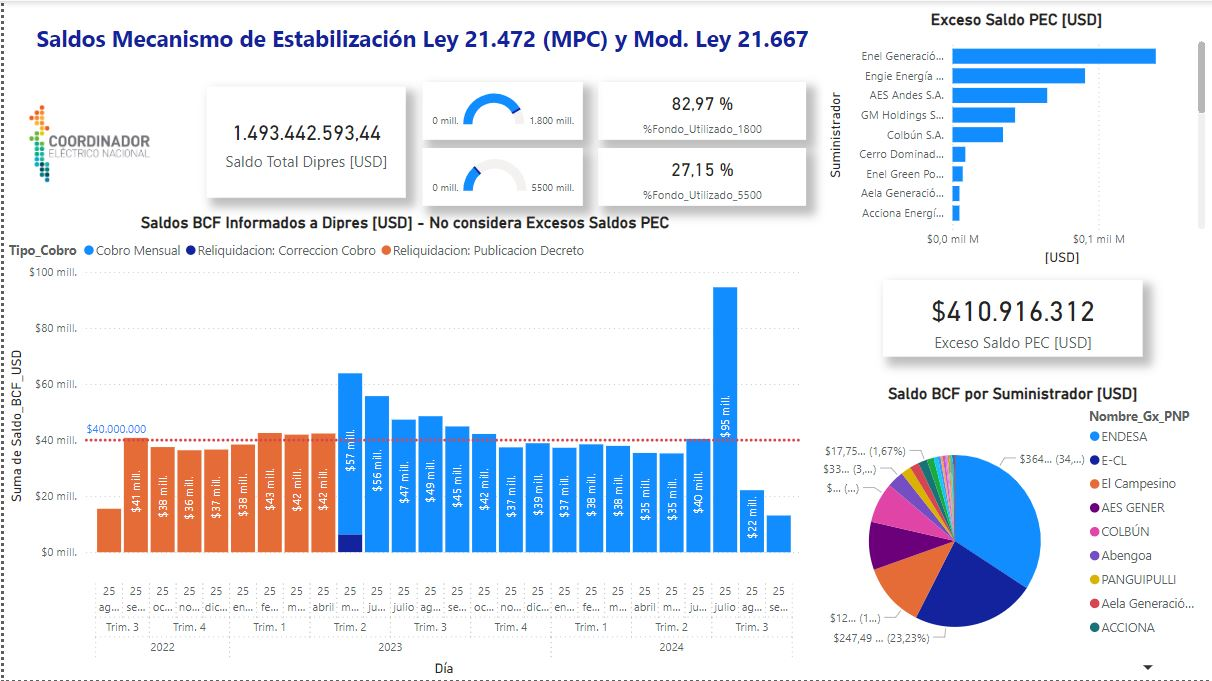

# <font color='blue'>__Caso de uso : Begoña Urtubia__</font>

## ***Análisis de extensión de pluma de contaminación según proporción de agua industrial y natural con isótopos estables de agua***


En minería es más común de lo que se quisiera tener focos de contaminación de distintos ambientes - aire, agua, suelo, entre otros - y se trabaja activamente para minimizar, controlar y remediar esta afectación.

En particular, la contaminación de agua subterránea con componentes químicos resultantes del proceso minero es un aspecto que se puede controlar mediante la construcción e implementación de pozos de bombeo, los que extraen el agua contaminada del subsuelo.

<img src="https://eg-academic.com/storage/2022/02/PORTADA-1.jpg" height="400" width="600">

***Figura 1.*** Relave minero, posible fuente de contaminación de agua subterránea

Para evaluar la efectividad del sistema de remediación de pozos, se toman muestras periódicamente del agua subterránea y se miden distintos parámetros indicadores, entre ellos los isótopos estables de la molécula de agua H<sub>2</sub>O.

Se sabe que el agua natural en la zona tiene cierta huella isotópica y la huella isotópica del agua industrial que se genera en la fuente de contaminación también es conocida.


|Tipo de agua| δD (‰)| δO<sup>18</sup> (‰)|
|:---:|:----:|:-----------------:|
|Natural|D<sub>nat</sub>|O<sup>18</sup><sub>nat</sub>|
|Industrial|D<sub>ind</sub>|O<sup>18</sup><sub>ind</sub>|


Con esta información de base, y teniendo los datos de huella isotópica de los distintos pozos a traves del tiempo,  es posible calcular la proporción de agua natural y de agua industrial que bombea cada pozo. Esto se hace utilizando es valor de el isótopo de O<sup>18</sup>


In [ ]:
# Nombres de pozos, valores de O18 de agua natural e industrial,
# valores de O18 de pozos y nombre de sector ficticios

def porcentaje_industrial(O18:float) -> float:
  """
  Dado una huella isotópica de O18, entrega el porcentaje de agua industrial
  Solo aplicable a sector "Los Higos"
  """
  nat = -12.5
  ind = -5.2
  if O18 > ind:
    return 100.0
  elif O18 < nat:
    return 0.0
  else:
    return round((O18-nat)*100/(ind-nat),2)

pozos = ['pozo1', 'pozo2', 'pozo3', 'pozo4', 'pozo5', 'pozo6', 'pozos7', 'pozo8', 'pozo9', 'pozo10']
pozos_O18 = [-7.7, -9.3, -8.2, -6.7, -10.9, -11.7, -12.4, -6.6, -8.5, -15.3]

por_ind = []
for o in pozos_O18:
  por_ind.append(porcentaje_industrial(o))
por_ind

[65.75, 43.84, 58.9, 79.45, 21.92, 10.96, 1.37, 80.82, 54.79, 0.0]

Una vez obtenidas las proporciones de agua industrial y de agua natural en cada pozo, y conociendo las coordenadas de estos, es posible interpolar el porcentaje de agua industrial en planta y con ello generar isolíneas de proporción agua industrial, de manera de conocer la extensión areal de la pluma de contaminación, cuyo límite es donde el porcentaje de agua industrial es 0%.

 Al hacer este análisis con los datos de O18 en distintas fechas, se obtiene el comportamiento en el tiempo de la pluma y con ello, se determina si es sistema de remediación está siendo capaz de controlar la pluma y la eficacia de este.